<div class="alert alert-block alert-info" >
    <h1>Machine Learning: Assignment 2</h1>
    <h2>This is a two week assignment</h2>
    <h3>General Information:</h3>
    <p>Feel free to add cells if required.<br> Feel free to write your own function block to reduce the redundancy.<br> Answers belong into the corresponding cells (below the question). <br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>). We don't consider that respective solution if you make this mistake (no excuse).</p>
    <br><br><b> Give proper comments, follow camel case for the function name, use proper readable variable names to your coding, if you didn't follow the instructions there will be a reduction in the points</b><br><br>    
    <h3>Submission:</h3>
    <p>Use the following naming convention for your submissions: LA_FirstnameLastname_dateOfLecture, e.g LA_JohnDoe_YYMMDD
     <br><br>Please submit your notebook via LEA. The assignment is due on <b>$21^{st}$ November, Saturday at 20:00.</b> </p>
    <h3>Group Work:</h3>
    <p>You are allowed to work in groups of up to two people. Please enter the UID (your username here) of each member of the group into the next cell. We apply plagiarism checking, so do not submit solutions from other people except your team members. If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.</p>
    <p><b>YOU SHOULD ONLY SUBMIT EXACTLY ONE PER GROUP</b></p>
    <h3>Questions about the Assignment:</h3>
    <p>If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions.</p></div>

In [1]:
'''
Group Work:
Enter the UID (i.e. student2s) of each team member into the variables. 
If you work alone please leave the second variable empty, or extend the list if necessary.
'''
member1 = 'kmanju2s'
member2 = 'pbenga2s'

# Build a spam classifier using Naive Bayes[100 points]

In [2]:
#Headers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re
#Include your other headers here

## Step 1:- Load your data[10 points]
#### There are three datasets for training: TrainDataset1.csv, TrainDataset2.csv and TrainDataset3.txt. Each dataset contains short messages with the labels (ham or spam). Load the dataset using pandas.

In [3]:
#Load your dataset in this cell
def loadData():
    #your code
    data1=pd.read_csv(r'TrainDataset1.csv')
    data2=pd.read_csv(r'TrainDataset2.csv')
    data3 = pd.read_csv('TrainDataset3.txt', delimiter='\t')
    return data1,data2,data3
dataset1,dataset2,dataset3=loadData()

print("Dataset 1 contatin :")
print(dataset1)
print("Dataset 2 contain :")
print(dataset2)
print("Dataset 3 contain :")
print(dataset3)

training_data = pd.DataFrame(np.concatenate([dataset1.values, dataset2.values, dataset3.values]), columns=dataset1.columns)
print(training_data)   

Dataset 1 contatin :
      type                                               text
0      ham  Hope you are having a good week. Just checking in
1      ham                            K..give back my thanks.
2      ham        Am also doing in cbe only. But have to pay.
3     spam  complimentary 4 STAR Ibiza Holiday or £10,000 ...
4     spam  okmail: Dear Dave this is your final notice to...
5      ham  Aiya we discuss later lar... Pick u up at 4 is...
6      ham                             Are you this much buzy
7      ham                    Please ask mummy to call father
8     spam  Marvel Mobile Play the official Ultimate Spide...
9      ham     fyi I'm at usf now, swing by the room whenever
10     ham  Sure thing big man. i have hockey elections at...
11     ham                                  I anything lor...
12     ham  By march ending, i should be ready. But will c...
13     ham                             Hmm well, night night 
14     ham  K I'll be sure to get up before noon 

## Step 2:- Preprocess the data[20 points]
#### Analyse the data, for this you will need to process the text, namely remove punctuation and stopwords, and then create a list of clean text words (Research how to do this [Hint:- see how the texts are pre-processed in Natural Language Processing]) use any libraries that you feel comfortable. Now Combine them into one big data set for the training.

In [4]:
# #Pre-process the data

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string


lemma=WordNetLemmatizer()

def preprocess(text):

    text=[char for char in text if char not in string.punctuation]
    text=''.join(text)
    text=[word for word in text.split() if word.lower() not in stopwords.words('english')]
    text=[PorterStemmer().stem(words) for words in text]
    text=[lemma.lemmatize(word=w,pos='v') for w in text]
    return text




## Step 3:- Visualise the data[20 points]
#### Try to visualize and analyse the data such as before and after pre processing, number of ham/spam etc. Analyse as many verticals you can, feel free to use graphical libraries like seaborn.

Bar chart:-



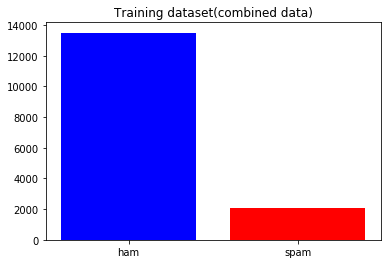

Pie chart:-



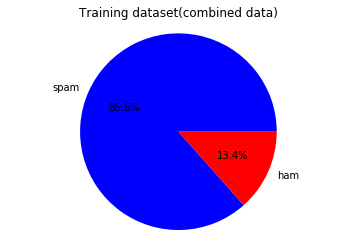

In [5]:
# Visualise the data   
#your code here

print("Bar chart:-\n")
ham_count1, spam_count1 = training_data.type.value_counts()
plt.bar(["ham", "spam"], [ham_count1, spam_count1], color=['blue', 'red'])
plt.title("Training dataset(combined data)")
plt.xlabel='length'
plt.ylabel='number of messages'
plt.show()


print("Pie chart:-\n")
ham_count1, spam_count1 = dataset1.type.value_counts()
labels = 'spam', 'ham'
fig1,ax1 = plt.subplots()
ax1.pie([ham_count1,spam_count1], labels=labels,colors=['blue', 'red'],autopct='%1.1f%%')
plt.title("Training dataset(combined data)")
ax1.axis('equal')
plt.show()


## Step 4:- Build, train and validate the classifer, [20 points]

### Training on supervised data (labelled data)

#### Use the data in order to build your own Naive Bayes classifier (You can either use existing Naive Bayes from sklearn or build your own). Build the classifier, train it and then validate. Provide your result in confusion matrix (use heatmap from seaborn) along with the classification report from sklearn. Validation accuracy should be around 99%.

Accuracy: 98.8454137267479 %
Classification_report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2689
           1       1.00      0.92      0.96       429

    accuracy                           0.99      3118
   macro avg       0.99      0.96      0.97      3118
weighted avg       0.99      0.99      0.99      3118



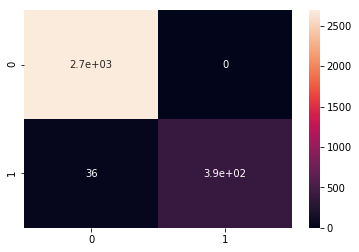

In [6]:
# Build, train and validate the classifier, 
#your code here
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from collections import Counter

#Considering spam messages as 1 and ham messages as 0
training_data['spam'] = training_data['type'].map( {'spam': 1, 'ham': 0} ).astype(int)   

x_train, x_validate, y_train, y_validate = train_test_split(training_data["text"], training_data["spam"], test_size=0.2, random_state=5)


My_pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer(analyzer=preprocess)),       #Vectorizing
    ('classifier',MultinomialNB())                             #NB classifier
])

#Training the classifier
My_pipeline.fit(x_train,y_train)

#Prediction using validation data
predicted_validation_data = My_pipeline.predict(x_validate)


#Calculating accuracy
accuracy = accuracy_score(y_validate, predicted_validation_data)
print("Accuracy:",accuracy*100,"%")

#Constructing the classification report
report = classification_report(y_validate, predicted_validation_data)
print("Classification_report: \n", report)

#Constucting the confusion matrix and visualizing it using heatmap
confusion_matrix_validation_data = confusion_matrix(y_validate, predicted_validation_data)
sns.heatmap(confusion_matrix_validation_data, annot=True)


## Step 5:- Test the classifier[10 points]

### Supervised classification[5 points] 

#### Test your Classifier using  the SMSSpamCollection.txt dataset provide a heatmap and classification report. Test accuracy should be around 99%.


Accuracy: 99.03069466882067 %
Classification_report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4824
           1       1.00      0.93      0.96       747

    accuracy                           0.99      5571
   macro avg       0.99      0.96      0.98      5571
weighted avg       0.99      0.99      0.99      5571



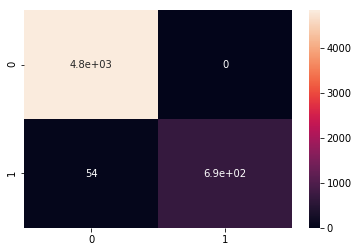

In [7]:
# Test the classifier
#your code here

#Loading the data
labelled_test_dataset = pd.read_csv('SMSSpamCollection.txt', delimiter='\t')
labelled_test_dataset.columns = ['type', 'text']

#Considering spam messages as 1 and ham messages as 0
labelled_test_dataset['spam'] = labelled_test_dataset['type'].map( {'spam': 1, 'ham': 0} ).astype(int)

#Prediction of labelled dataset
predicted_labelled_data = My_pipeline.predict(labelled_test_dataset["text"])

#Accuracy of labelled dataset
accuracy_labelled_data = accuracy_score(labelled_test_dataset["spam"], predicted_labelled_data)
print("Accuracy:",accuracy_labelled_data*100,"%")

#Classification report for labelled dataset
report_labelled_data = classification_report(labelled_test_dataset["spam"], predicted_labelled_data)
print("Classification_report: \n", report_labelled_data)

#Constucting the confusion matrix and visualizing it using heatmap
confusion_matrix_labelled_data = confusion_matrix(labelled_test_dataset["spam"], predicted_labelled_data)
sns.heatmap(confusion_matrix_labelled_data, annot=True)


### Unsupervised classification[5 points] 

#### Test your Classifier using  the TestDataset.csv dataset. This dataset is not labelled so kindly predict the labels and visualise it[5 points].

Bar chart:-



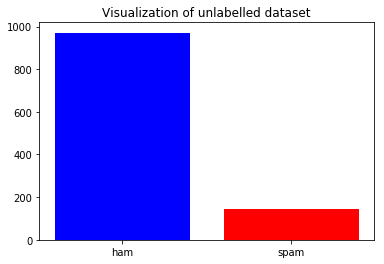

Pie chart:-



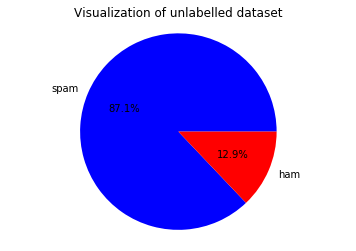

In [8]:
# Test the classifier
#your code here

#Loading the data
unlabelled_test_dataset = pd.read_csv('TestDataset.csv')
unlabelled_test_dataset.columns = ['type']

#Prediction of unlabelled dataset and plotting it
predicted_unlabelled_data = My_pipeline.predict(unlabelled_test_dataset["type"])
spam_count_predicted_unlabelled_data = np.count_nonzero(predicted_unlabelled_data == 1)
ham_count_predicted_unlabelled_data = np.count_nonzero(predicted_unlabelled_data == 0)


print("Bar chart:-\n")
plt.bar(["ham", "spam"], [ham_count_predicted_unlabelled_data,spam_count_predicted_unlabelled_data], color=['blue', 'red'],label=labels)
plt.title("Visualization of unlabelled dataset")
plt.xlabel='length'
plt.ylabel='number of messages'
plt.show()

print("Pie chart:-\n")
labels = 'spam', 'ham'
fig2, ax2 = plt.subplots()
ax2.pie([ham_count_predicted_unlabelled_data,spam_count_predicted_unlabelled_data], labels=labels,colors=['blue', 'red'],autopct='%1.1f%%')
plt.title("Visualization of unlabelled dataset")
ax2.axis('equal')
plt.show()

## Step 6:- Cheat the classifier[20 points]

#### Try to cheat the classifier by adding "good words" to the end of test dataset(TestDataset.csv) e.g:- Oh! no share Market has fallen down by $100,000 due to Corona outbreak... try mixing up spam and ham words see how the classifier works. Output the results in a good format to validate your work[15 points]  

Accuracy: 80.0 %
Classification_report: 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.00      0.00      0.00         2

    accuracy                           0.80        10
   macro avg       0.40      0.50      0.44        10
weighted avg       0.64      0.80      0.71        10

Heatmap of confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


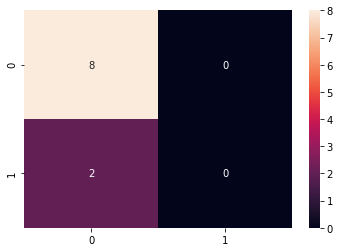

In [9]:
# Cheat the classifier
#your code here
cheating_classifier_msgs = ['CONGRATULATIONS!! Status of your application for HBRS MAS course...', 
              'Urgent! Hello bro, our group has planned for a movie in 30 minutes, Be ready ASAP, i will pick you up...', 
              'Go until jurong point, crazy..Available only... ', 
              'Happy morning, lets have breakfast at ... after the jog', 
              'CONGRATULATIONS!! Your Number was selected as the Winner in Power Lottery Competition, Kindly send your Details...', 
              'As per you request, "oh baby" song has been set as your caller tune', 
              'Dear Beneficiary, We want to confirm to you that our Bank {HSBC}, USA, has issued an ATM MasterCard Cash of $500,000 USD in mark', 
              'Hello Prabhudev, Welcome to Blizzard services!You have successfully created the following Blizzard Account:', 
              'Dear Kaushik, Your SmartStatement was created and linkind to this email ...',
              'Dear customer, due to schedule maintainence activity net and mobile banking will not be available from 10-10-2020 ...']
cheating_classifier_msg_values = [0,0,0,0,1,0,1,0,0,0]
data = {'text': cheating_classifier_msgs, 'spam': cheating_classifier_msg_values}
cheating_classifier_dataset = pd.DataFrame(data=data)

predicted_cheating_classifier_dataset = My_pipeline.predict(cheating_classifier_dataset["text"])

accuracy_cheating_classifier_dataset = accuracy_score(cheating_classifier_dataset["spam"], predicted_cheating_classifier_dataset)
print("Accuracy:",accuracy_cheating_classifier_dataset*100,"%")

#Building a text report showing the main classification metrics
report_cheating_classifier_dataset = classification_report(cheating_classifier_dataset["spam"], predicted_cheating_classifier_dataset)
print("Classification_report: \n", report_cheating_classifier_dataset)

#Constucting the confusion matrix and visualizing it 
confusion_matrix_cheating_classifier_dataset = confusion_matrix(cheating_classifier_dataset["spam"], predicted_cheating_classifier_dataset)
print("Heatmap of confusion matrix")
sns.heatmap(confusion_matrix_cheating_classifier_dataset, annot=True)




#### Write your analysis of how you intended to cheat the classifier and how it performed in few words (provide your inference)[5 points]

**Give your expalanation here**

Using the labelled inputs like ham and spam messages the classifier is trained and by this the classifier will have the ability to classify the pure ham and spam messages, the Naive Bayes Classifier uses Bayes Theorem of Probability

For Cheating the classifier, we will add some spam words with the ham messages so as to test the classifier's accuracy whether is it working as intended.

***Inference:***
Cheat_Data: Created 10 messages which has both ham and spam words in their message.
The Ham and Spam key words were mixed up to form the cheat messages, in our messages "CONGRATUALTIONS" is both in ham and spam , but the detection was upto the classifies to detect the same. Based on the content of the full message the classifier was able to correctly detect whether it was a ham or spam message.



***One More observation***
The accuracy of the model depends on the preprocess of training data. If preprocess is done properly the accuracy increases if the data is not preprocessed properly then the accuracy decreases.


### Help

<a href="https://towardsdatascience.com/spam-filtering-using-naive-bayes-98a341224038" target="_top">Spam classification</a><br>
<a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html" target="_top">Seaborn Heatmap</a><br>
<a href="https://scikit-learn.org/stable/modules/naive_bayes.html" target="_top">Sklearn Naive Bayes</a><br>
<a href="https://scikit-learn.org/stable/modules/model_evaluation.html" target="_top">Sklearn Metrics</a><br>
<a href="https://pandas.pydata.org/docs/getting_started/index.html#getting-started" target="_top">Intro to Pandas</a>